In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

Read Dataset

In [ ]:
data = pd.read_csv("bone_marrow.csv")

In [ ]:
data = data.drop('id',axis=1)
#data = data.drop('time_to_acute_GvHD_III_IV',axis=1)
data.head(10)

,donor_age,donor_age_below_35,donor_ABO,donor_CMV,recipient_age,recipient_age_below_10,recipient_age_int,recipient_gender,recipient_body_mass,recipient_ABO,...,CD3_to_CD34_ratio,ANC_recovery,PLT_recovery,acute_GvHD_II_III_IV,acute_GvHD_III_IV,time_to_acute_GvHD_III_IV,extensive_chronic_GvHD,relapse,survival_time,survival_status
0,22.830137,yes,A,present,9.6,yes,5_10,male,35.0,A,...,1.338760,19.0,51.0,yes,yes,32,no,no,999,0
1,23.342466,yes,B,absent,4.0,yes,0_5,male,20.6,B,...,11.078295,16.0,37.0,yes,no,1000000,no,yes,163,1
2,26.394521,yes,B,absent,6.6,yes,5_10,male,23.4,B,...,19.013230,23.0,20.0,yes,no,1000000,no,yes,435,1
3,39.684932,no,A,present,18.1,no,10_20,female,50.0,AB,...,29.481647,23.0,29.0,yes,yes,19,NaN,no,53,1
4,33.358904,yes,A,absent,1.3,yes,0_5,female,9.0,AB,...,3.972255,14.0,14.0,no,no,1000000,no,no,2043,0
5,27.391781,yes,AB,NaN,8.9,yes,5_10,male,40.0,NaN,...,8.412758,16.0,70.0,no,no,1000000,no,no,2800,0
6,34.520548,yes,NaN,absent,14.4,no,10_20,female,51.0,A,...,2.406248,17.0,29.0,yes,yes,18,NaN,no,41,1
7,21.435616,yes,NaN,present,18.2,no,10_20,male,56.0,A,...,NaN,22.0,58.0,yes,yes,22,NaN,no,45,1
8,32.641096,yes,AB,absent,7.9,yes,5_10,male,20.5,NaN,...,3.772555,15.0,14.0,no,no,1000000,no,no,671,0
9,28.783562,yes,A,absent,4.7,yes,0_5,male,16.5,NaN,...,1.035244,16.0,17.0,yes,no,1000000,no,no,676,0


Null Value Handling

In [ ]:
data.isnull().sum()

donor_age                     0
donor_age_below_35            0
donor_ABO                    74
donor_CMV                     2
recipient_age                 0
recipient_age_below_10        0
recipient_age_int             0
recipient_gender              0
recipient_body_mass           2
recipient_ABO                49
recipient_rh                  2
recipient_CMV                14
disease                       0
disease_group                 0
gender_match                  0
ABO_match                     1
CMV_status                   16
HLA_match                     0
HLA_mismatch                  0
antigen                       1
allel                         1
HLA_group_1                   0
risk_group                    0
stem_cell_source              0
tx_post_relapse               0
CD34_x1e6_per_kg              0
CD3_x1e8_per_kg               5
CD3_to_CD34_ratio             5
ANC_recovery                  5
PLT_recovery                 17
acute_GvHD_II_III_IV          0
acute_Gv

Handling null value using mean for numerical data

In [ ]:
m1 = data.recipient_body_mass.mean()
m2 = data.CD3_x1e8_per_kg.mean()
m3 = data.CD3_to_CD34_ratio.mean()
m4 = data.ANC_recovery.mean()
m5 = data.PLT_recovery.mean()

data.recipient_body_mass = data.recipient_body_mass.fillna(m1)
data.CD3_x1e8_per_kg = data.CD3_x1e8_per_kg.fillna(m2)
data.CD3_to_CD34_ratio = data.CD3_to_CD34_ratio.fillna(m3)
data.ANC_recovery = data.ANC_recovery.fillna(m4)
data.PLT_recovery = data.PLT_recovery.fillna(m4)

In [ ]:
data['extensive_chronic_GvHD'].value_counts()

no     128
yes     28
Name: extensive_chronic_GvHD, dtype: int64

Handling null value for categorical data using most frequent value

In [ ]:
data.donor_ABO = data.donor_ABO.fillna('A')
data.donor_CMV = data.donor_CMV.fillna('absent')
data.recipient_ABO = data.recipient_ABO.fillna('A')
data.recipient_rh = data.recipient_rh.fillna('plus')
data.recipient_CMV = data.recipient_CMV.fillna('present')
data.ABO_match = data.ABO_match.fillna('mismatched')
data.CMV_status = data.CMV_status.fillna(2)
data.antigen = data.antigen.fillna(0)
data.allel = data.allel.fillna(0)
data.extensive_chronic_GvHD = data.extensive_chronic_GvHD.fillna('no')

In [ ]:
data.isnull().sum()

donor_age                    0
donor_age_below_35           0
donor_ABO                    0
donor_CMV                    0
recipient_age                0
recipient_age_below_10       0
recipient_age_int            0
recipient_gender             0
recipient_body_mass          0
recipient_ABO                0
recipient_rh                 0
recipient_CMV                0
disease                      0
disease_group                0
gender_match                 0
ABO_match                    0
CMV_status                   0
HLA_match                    0
HLA_mismatch                 0
antigen                      0
allel                        0
HLA_group_1                  0
risk_group                   0
stem_cell_source             0
tx_post_relapse              0
CD34_x1e6_per_kg             0
CD3_x1e8_per_kg              0
CD3_to_CD34_ratio            0
ANC_recovery                 0
PLT_recovery                 0
acute_GvHD_II_III_IV         0
acute_GvHD_III_IV            0
time_to_

In [ ]:
data.head(10)

,donor_age,donor_age_below_35,donor_ABO,donor_CMV,recipient_age,recipient_age_below_10,recipient_age_int,recipient_gender,recipient_body_mass,recipient_ABO,...,CD3_to_CD34_ratio,ANC_recovery,PLT_recovery,acute_GvHD_II_III_IV,acute_GvHD_III_IV,time_to_acute_GvHD_III_IV,extensive_chronic_GvHD,relapse,survival_time,survival_status
0,22.830137,yes,A,present,9.6,yes,5_10,male,35.0,A,...,1.338760,19.0,51.0,yes,yes,32,no,no,999,0
1,23.342466,yes,B,absent,4.0,yes,0_5,male,20.6,B,...,11.078295,16.0,37.0,yes,no,1000000,no,yes,163,1
2,26.394521,yes,B,absent,6.6,yes,5_10,male,23.4,B,...,19.013230,23.0,20.0,yes,no,1000000,no,yes,435,1
3,39.684932,no,A,present,18.1,no,10_20,female,50.0,AB,...,29.481647,23.0,29.0,yes,yes,19,no,no,53,1
4,33.358904,yes,A,absent,1.3,yes,0_5,female,9.0,AB,...,3.972255,14.0,14.0,no,no,1000000,no,no,2043,0
5,27.391781,yes,AB,absent,8.9,yes,5_10,male,40.0,A,...,8.412758,16.0,70.0,no,no,1000000,no,no,2800,0
6,34.520548,yes,A,absent,14.4,no,10_20,female,51.0,A,...,2.406248,17.0,29.0,yes,yes,18,no,no,41,1
7,21.435616,yes,A,present,18.2,no,10_20,male,56.0,A,...,5.385096,22.0,58.0,yes,yes,22,no,no,45,1
8,32.641096,yes,AB,absent,7.9,yes,5_10,male,20.5,A,...,3.772555,15.0,14.0,no,no,1000000,no,no,671,0
9,28.783562,yes,A,absent,4.7,yes,0_5,male,16.5,A,...,1.035244,16.0,17.0,yes,no,1000000,no,no,676,0


Feaure Engineering

In [ ]:
data['donor_age_below_35']=np.where(data['donor_age_below_35']=="yes",1,0)
data['donor_CMV']=np.where(data['donor_CMV']=="present",1,0)
data['recipient_age_below_10']=np.where(data['recipient_age_below_10']=="yes",1,0)
data['recipient_gender']=np.where(data['recipient_gender']=="male",1,0)
data['recipient_rh']=np.where(data['recipient_rh']=="plus",1,0)
data['recipient_CMV']=np.where(data['recipient_CMV']=="present",1,0)
data['disease_group']=np.where(data['disease_group']=="malignant",1,0)
data['gender_match']=np.where(data['gender_match']=="female_to_male",1,0)
data['ABO_match']=np.where(data['ABO_match']=="matched",1,0)
data['HLA_mismatch']=np.where(data['HLA_mismatch']=="matched",1,0)
data['risk_group']=np.where(data['risk_group']=="high",1,0)
data['stem_cell_source']=np.where(data['stem_cell_source']=="peripheral_blood",1,0)
data['tx_post_relapse']=np.where(data['tx_post_relapse']=="yes",1,0)
data['acute_GvHD_II_III_IV']=np.where(data['acute_GvHD_II_III_IV']=="yes",1,0)
data['acute_GvHD_III_IV']=np.where(data['acute_GvHD_III_IV']=="yes",1,0)
data['extensive_chronic_GvHD']=np.where(data['extensive_chronic_GvHD']=="yes",1,0)
data['relapse']=np.where(data['relapse']=="yes",1,0)

In [ ]:
data.head(10)

,donor_age,donor_age_below_35,donor_ABO,donor_CMV,recipient_age,recipient_age_below_10,recipient_age_int,recipient_gender,recipient_body_mass,recipient_ABO,...,CD3_to_CD34_ratio,ANC_recovery,PLT_recovery,acute_GvHD_II_III_IV,acute_GvHD_III_IV,time_to_acute_GvHD_III_IV,extensive_chronic_GvHD,relapse,survival_time,survival_status
0,22.830137,1,A,1,9.6,1,5_10,1,35.0,A,...,1.338760,19.0,51.0,1,1,32,0,0,999,0
1,23.342466,1,B,0,4.0,1,0_5,1,20.6,B,...,11.078295,16.0,37.0,1,0,1000000,0,1,163,1
2,26.394521,1,B,0,6.6,1,5_10,1,23.4,B,...,19.013230,23.0,20.0,1,0,1000000,0,1,435,1
3,39.684932,0,A,1,18.1,0,10_20,0,50.0,AB,...,29.481647,23.0,29.0,1,1,19,0,0,53,1
4,33.358904,1,A,0,1.3,1,0_5,0,9.0,AB,...,3.972255,14.0,14.0,0,0,1000000,0,0,2043,0
5,27.391781,1,AB,0,8.9,1,5_10,1,40.0,A,...,8.412758,16.0,70.0,0,0,1000000,0,0,2800,0
6,34.520548,1,A,0,14.4,0,10_20,0,51.0,A,...,2.406248,17.0,29.0,1,1,18,0,0,41,1
7,21.435616,1,A,1,18.2,0,10_20,1,56.0,A,...,5.385096,22.0,58.0,1,1,22,0,0,45,1
8,32.641096,1,AB,0,7.9,1,5_10,1,20.5,A,...,3.772555,15.0,14.0,0,0,1000000,0,0,671,0
9,28.783562,1,A,0,4.7,1,0_5,1,16.5,A,...,1.035244,16.0,17.0,1,0,1000000,0,0,676,0


In [ ]:
data['donor_ABO'].value_counts()

A     144
B      28
AB     15
Name: donor_ABO, dtype: int64

In [ ]:
donor_ABO = pd.get_dummies(data['donor_ABO'],drop_first=True)
recipient_age_int = pd.get_dummies(data['recipient_age_int'],drop_first=True)
recipient_ABO = pd.get_dummies(data['recipient_ABO'],drop_first=True)
disease = pd.get_dummies(data['disease'],drop_first=True)
HLA_match = pd.get_dummies(data['HLA_match'],drop_first=True)
HLA_group_1 = pd.get_dummies(data['HLA_group_1'],drop_first=True)

data = pd.concat([data,donor_ABO,recipient_age_int,recipient_ABO,disease,HLA_match,HLA_group_1],axis=1)

In [ ]:
 catagorical_data = data[['donor_ABO','recipient_age_int','recipient_ABO','disease','HLA_match',
                                         'HLA_group_1']]
# label_encode = LabelEncoder()
# after_label_encoding = catagorical_data.apply(LabelEncoder().fit_transform)



In [ ]:
#data = pd.concat([data,catagorical_data],axis=1)
data = data.drop(catagorical_data,axis=1)
data.head(10)

,donor_age,donor_age_below_35,donor_CMV,recipient_age,recipient_age_below_10,recipient_gender,recipient_body_mass,recipient_rh,recipient_CMV,disease_group,...,nonmalignant,10-Jul,10-Oct,10-Sep,matched,mismatched,one_allel,one_antigen,three_diffs,two_diffs
0,22.830137,1,1,9.6,1,1,35.0,1,1,1,...,0,0,1,0,1,0,0,0,0,0
1,23.342466,1,0,4.0,1,1,20.6,1,0,1,...,0,0,1,0,1,0,0,0,0,0
2,26.394521,1,0,6.6,1,1,23.4,1,1,1,...,0,0,1,0,1,0,0,0,0,0
3,39.684932,0,1,18.1,0,0,50.0,1,0,1,...,0,0,1,0,1,0,0,0,0,0
4,33.358904,1,0,1.3,1,0,9.0,0,1,1,...,0,0,0,1,0,0,0,1,0,0
5,27.391781,1,0,8.9,1,1,40.0,1,1,1,...,0,0,1,0,1,0,0,0,0,0
6,34.520548,1,0,14.4,0,0,51.0,0,1,1,...,0,0,1,0,1,0,0,0,0,0
7,21.435616,1,1,18.2,0,1,56.0,1,0,0,...,1,1,0,0,0,1,0,0,0,0
8,32.641096,1,0,7.9,1,1,20.5,1,1,0,...,1,0,1,0,1,0,0,0,0,0
9,28.783562,1,0,4.7,1,1,16.5,1,1,0,...,1,0,0,1,0,0,0,0,0,0


Normalization using standard scaling method

In [ ]:
# from sklearn.preprocessing import MinMaxScaler
# mms = MinMaxScaler(feature_range=(0,1))
# after_min_max = mms.fit_transform()

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

scaling_data = data[['donor_age','recipient_age','recipient_body_mass','CD34_x1e6_per_kg','CD3_x1e8_per_kg',
                     'CD3_to_CD34_ratio','ANC_recovery','PLT_recovery','survival_time']]

data = data.drop(scaling_data,axis=1)

# sds = StandardScaler()
# after_standart_scaler = sds.fit_transform(scaling_data)
mms = MinMaxScaler(feature_range=(0,1))
after_min_max = mms.fit_transform(scaling_data)

after_standart_scaler = pd.DataFrame(after_min_max, columns = ['donor_age','recipient_age','recipient_body_mass','CD34_x1e6_per_kg','CD3_x1e8_per_kg',
                     'CD3_to_CD34_ratio','ANC_recovery','PLT_recovery','survival_time'])


data = pd.concat([data,after_standart_scaler],axis=1)
data.head(10)

,donor_age_below_35,donor_CMV,recipient_age_below_10,recipient_gender,recipient_rh,recipient_CMV,disease_group,gender_match,ABO_match,CMV_status,...,two_diffs,donor_age,recipient_age,recipient_body_mass,CD34_x1e6_per_kg,CD3_x1e8_per_kg,CD3_to_CD34_ratio,ANC_recovery,PLT_recovery,survival_time
0,1,1,1,1,1,1,1,0,1,3.0,...,0,0.113355,0.459184,0.297741,0.112476,0.267267,0.011420,0.588235,0.152174,0.295712
1,1,0,1,1,1,0,1,0,1,0.0,...,0,0.127236,0.173469,0.149897,0.065099,0.018519,0.109446,0.411765,0.101449,0.046754
2,1,0,1,1,1,1,1,0,1,2.0,...,0,0.209932,0.306122,0.178645,0.125461,0.019019,0.189309,0.823529,0.039855,0.127755
3,0,1,0,0,1,0,1,0,0,1.0,...,0,0.570039,0.892857,0.451745,0.060712,0.005005,0.294670,0.823529,0.072464,0.013996
4,1,0,1,0,0,1,1,0,0,0.0,...,0,0.398634,0.035714,0.030801,0.895947,0.651151,0.037925,0.294118,0.018116,0.606611
5,1,0,1,1,1,1,1,0,0,2.0,...,0,0.236953,0.423469,0.349076,0.043516,0.017518,0.082618,0.411765,0.221014,0.832043
6,1,0,0,0,0,1,1,0,0,2.0,...,0,0.430109,0.704082,0.462012,0.298122,0.367868,0.022164,0.470588,0.072464,0.010423
7,1,1,0,1,1,0,0,0,0,1.0,...,0,0.075570,0.897959,0.513347,0.098614,0.235521,0.052145,0.764706,0.177536,0.011614
8,1,0,1,1,1,1,0,0,0,2.0,...,0,0.379185,0.372449,0.148871,0.399193,0.310310,0.035915,0.352941,0.018116,0.198035
9,1,0,1,1,1,1,0,1,0,2.0,...,0,0.274664,0.209184,0.107803,0.121074,0.369870,0.008365,0.411765,0.028986,0.199524


Extract and create target feature

In [ ]:
gvhd_col = data[['acute_GvHD_II_III_IV','extensive_chronic_GvHD']]  
data = data.drop(gvhd_col,axis=1)

In [ ]:
gvhd = []

for col1,col2 in zip(gvhd_col.acute_GvHD_II_III_IV, gvhd_col.extensive_chronic_GvHD): 
    if col1==1 and col2==1:
        gvhd.append(0) #both
    elif col1==0 and col2==0:
        gvhd.append(1) #none
    elif col1==1 and col2==0:
        gvhd.append(2) #aGvHD
    elif col1==0 and col2==1:
        gvhd.append(3) #cGvHD
        


In [ ]:
gvhd_col['GvHD_Diseases'] = gvhd

In [ ]:
gvhd_col

,acute_GvHD_II_III_IV,extensive_chronic_GvHD,GvHD_Diseases
0,1,0,2
1,1,0,2
2,1,0,2
3,1,0,2
4,0,0,1
...,...,...,...
182,1,0,2
183,0,0,1
184,1,0,2
185,1,1,0


In [ ]:
gvhd_col['GvHD_Diseases'].value_counts()

2    89
1    70
0    23
3     5
Name: GvHD_Diseases, dtype: int64

In [ ]:
GvHD = gvhd_col['GvHD_Diseases']
data  = pd.concat([data,GvHD],axis=1)
data.head(10)

,donor_age_below_35,donor_CMV,recipient_age_below_10,recipient_gender,recipient_rh,recipient_CMV,disease_group,gender_match,ABO_match,CMV_status,...,donor_age,recipient_age,recipient_body_mass,CD34_x1e6_per_kg,CD3_x1e8_per_kg,CD3_to_CD34_ratio,ANC_recovery,PLT_recovery,survival_time,GvHD_Diseases
0,1,1,1,1,1,1,1,0,1,3.0,...,0.113355,0.459184,0.297741,0.112476,0.267267,0.011420,0.588235,0.152174,0.295712,2
1,1,0,1,1,1,0,1,0,1,0.0,...,0.127236,0.173469,0.149897,0.065099,0.018519,0.109446,0.411765,0.101449,0.046754,2
2,1,0,1,1,1,1,1,0,1,2.0,...,0.209932,0.306122,0.178645,0.125461,0.019019,0.189309,0.823529,0.039855,0.127755,2
3,0,1,0,0,1,0,1,0,0,1.0,...,0.570039,0.892857,0.451745,0.060712,0.005005,0.294670,0.823529,0.072464,0.013996,2
4,1,0,1,0,0,1,1,0,0,0.0,...,0.398634,0.035714,0.030801,0.895947,0.651151,0.037925,0.294118,0.018116,0.606611,1
5,1,0,1,1,1,1,1,0,0,2.0,...,0.236953,0.423469,0.349076,0.043516,0.017518,0.082618,0.411765,0.221014,0.832043,1
6,1,0,0,0,0,1,1,0,0,2.0,...,0.430109,0.704082,0.462012,0.298122,0.367868,0.022164,0.470588,0.072464,0.010423,2
7,1,1,0,1,1,0,0,0,0,1.0,...,0.075570,0.897959,0.513347,0.098614,0.235521,0.052145,0.764706,0.177536,0.011614,2
8,1,0,1,1,1,1,0,0,0,2.0,...,0.379185,0.372449,0.148871,0.399193,0.310310,0.035915,0.352941,0.018116,0.198035,1
9,1,0,1,1,1,1,0,1,0,2.0,...,0.274664,0.209184,0.107803,0.121074,0.369870,0.008365,0.411765,0.028986,0.199524,2


In [ ]:
x = data.drop("GvHD_Diseases",axis=1)
x.head(10)

,donor_age_below_35,donor_CMV,recipient_age_below_10,recipient_gender,recipient_rh,recipient_CMV,disease_group,gender_match,ABO_match,CMV_status,...,two_diffs,donor_age,recipient_age,recipient_body_mass,CD34_x1e6_per_kg,CD3_x1e8_per_kg,CD3_to_CD34_ratio,ANC_recovery,PLT_recovery,survival_time
0,1,1,1,1,1,1,1,0,1,3.0,...,0,0.113355,0.459184,0.297741,0.112476,0.267267,0.011420,0.588235,0.152174,0.295712
1,1,0,1,1,1,0,1,0,1,0.0,...,0,0.127236,0.173469,0.149897,0.065099,0.018519,0.109446,0.411765,0.101449,0.046754
2,1,0,1,1,1,1,1,0,1,2.0,...,0,0.209932,0.306122,0.178645,0.125461,0.019019,0.189309,0.823529,0.039855,0.127755
3,0,1,0,0,1,0,1,0,0,1.0,...,0,0.570039,0.892857,0.451745,0.060712,0.005005,0.294670,0.823529,0.072464,0.013996
4,1,0,1,0,0,1,1,0,0,0.0,...,0,0.398634,0.035714,0.030801,0.895947,0.651151,0.037925,0.294118,0.018116,0.606611
5,1,0,1,1,1,1,1,0,0,2.0,...,0,0.236953,0.423469,0.349076,0.043516,0.017518,0.082618,0.411765,0.221014,0.832043
6,1,0,0,0,0,1,1,0,0,2.0,...,0,0.430109,0.704082,0.462012,0.298122,0.367868,0.022164,0.470588,0.072464,0.010423
7,1,1,0,1,1,0,0,0,0,1.0,...,0,0.075570,0.897959,0.513347,0.098614,0.235521,0.052145,0.764706,0.177536,0.011614
8,1,0,1,1,1,1,0,0,0,2.0,...,0,0.379185,0.372449,0.148871,0.399193,0.310310,0.035915,0.352941,0.018116,0.198035
9,1,0,1,1,1,1,0,1,0,2.0,...,0,0.274664,0.209184,0.107803,0.121074,0.369870,0.008365,0.411765,0.028986,0.199524


In [ ]:
y = data['GvHD_Diseases']
y.head(5)

0    2
1    2
2    2
3    2
4    1
Name: GvHD_Diseases, dtype: int64

Chi-squared test

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

fit_features = SelectKBest(score_func=chi2)
fit_features.fit(x,y)
score = pd.DataFrame(fit_features.scores_,columns=['Score'])

feature_name = pd.DataFrame(x.columns)

top_features = pd.concat([feature_name,score],axis=1)
top_features.sort_index(ascending=True)

,0,Score
0,donor_age_below_35,6.459562e-01
1,donor_CMV,3.155861e+00
2,recipient_age_below_10,7.589333e-01
3,recipient_gender,6.406510e-01
4,recipient_rh,1.322483e+00
5,recipient_CMV,2.243535e+00
6,disease_group,7.985714e-01
7,gender_match,2.892124e-02
8,ABO_match,2.776784e+00
9,CMV_status,4.657289e+00


In [ ]:
top_features.nlargest(12,'Score')

,0,Score
17,time_to_acute_GvHD_III_IV,7.221225e+06
16,acute_GvHD_III_IV,2.679746e+01
11,antigen,7.417389e+00
21,B,6.988881e+00
20,AB,6.311396e+00
23,5_10,5.824633e+00
9,CMV_status,4.657289e+00
12,allel,4.644741e+00
38,two_diffs,4.170400e+00
35,one_allel,3.914176e+00


In [ ]:
# x = data[['time_to_acute_GvHD_III_IV','acute_GvHD_III_IV',
#           'antigen','B','AB','5_10','CMV_status',
#           'allel','two_diffs','one_allel','nonmalignant','AB','10-Oct','matched','donor_CMV','relapse','B','ABO_match',
#          'tx_post_relapse','three_diffs','10-Sep','recipient_CMV','one_antigen','survival_status','AML','chronic'
#          ,'recipient_rh','PLT_recovery','10_20','10-Jul']]

x = data[['time_to_acute_GvHD_III_IV','acute_GvHD_III_IV',
          'antigen','B','AB','5_10','CMV_status',
          'allel','two_diffs','one_allel','nonmalignant','AB']]

In [ ]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=1)

In [ ]:
xtrain.shape

(149, 15)

In [ ]:
ytrain.shape

(149,)

Feature Selection

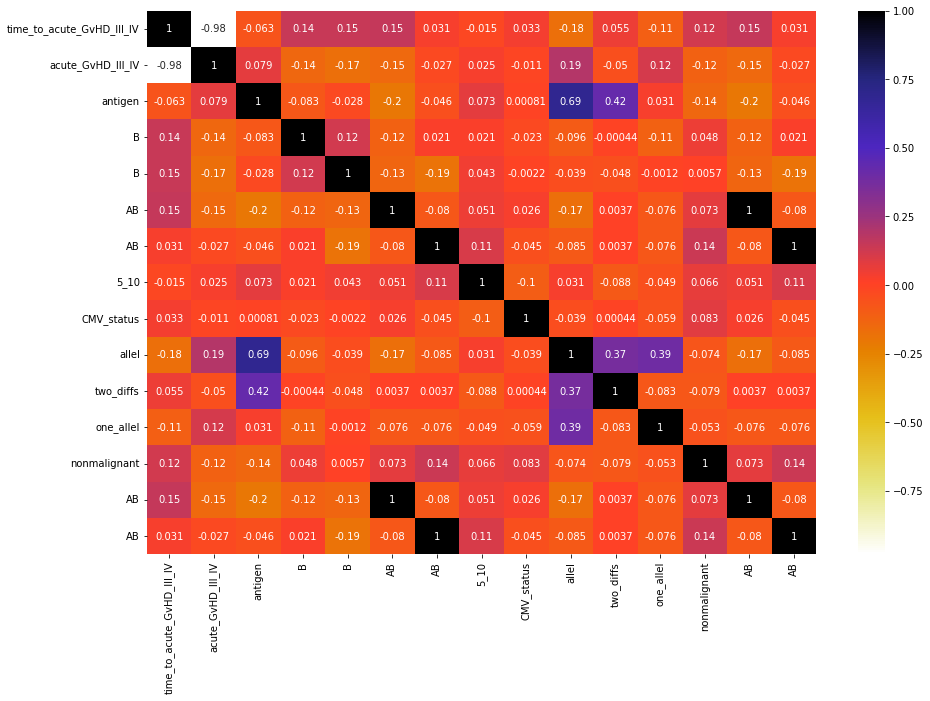

In [ ]:
plt.figure(figsize=(15,10))
corr = xtrain.corr()
sns.heatmap(corr,annot=True,cmap=plt.cm.CMRmap_r)
plt.show()

In [ ]:
def correlation(dataset,threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i,j]>threshold):
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

corr_features = correlation(xtrain,0.60)
corr_features

{'AB', 'allel'}

In [ ]:
x_train = xtrain.drop(corr_features,axis=1)
x_train

,time_to_acute_GvHD_III_IV,acute_GvHD_III_IV,antigen,B,B,5_10,CMV_status,two_diffs,one_allel,nonmalignant
107,1000000,0,2.0,0,0,1,0.0,0,0,0
122,100,0,0.0,0,1,0,0.0,0,0,0
168,1000000,0,0.0,0,1,0,2.0,0,0,0
69,1000000,0,1.0,0,0,0,2.0,0,1,0
42,1000000,0,0.0,0,0,0,0.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
133,42,1,1.0,0,0,0,0.0,0,1,0
137,1000000,0,3.0,1,0,0,2.0,1,0,0
72,1000000,0,0.0,0,0,0,3.0,0,0,1
140,15,1,0.0,0,0,0,2.0,0,0,0


In [ ]:
x_test = xtest.drop(corr_features,axis=1)
x_test.head(10)

,time_to_acute_GvHD_III_IV,acute_GvHD_III_IV,antigen,B,B,5_10,CMV_status,two_diffs,one_allel,nonmalignant
16,1000000,0,1.0,0,0,0,1.0,0,1,0
172,17,1,2.0,0,0,0,0.0,1,0,0
127,1000000,0,2.0,0,0,0,2.0,0,0,0
40,1000000,0,2.0,0,0,0,1.0,0,0,0
106,11,1,3.0,0,0,0,2.0,1,0,0
170,1000000,0,2.0,0,0,0,0.0,0,0,0
98,26,1,3.0,0,0,1,0.0,1,0,0
148,1000000,0,2.0,0,0,0,3.0,0,0,0
35,1000000,0,0.0,0,0,0,1.0,0,0,0
56,1000000,0,2.0,0,0,0,3.0,0,0,1


Chi-squared test

Random Forest

In [ ]:
rf = RandomForestClassifier(n_estimators=100)
rf.fit(x_train,ytrain)
rf.score(x_test,ytest)

0.5263157894736842

Decision Tree

In [ ]:
from sklearn import tree
classifier = tree.DecisionTreeClassifier()
classifier = classifier.fit(x_train,ytrain)
classifier.score(x_test,ytest)

0.4473684210526316

Multinomial Naive Bayes

In [ ]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(x_train,ytrain)
model.score(x_test,ytest)

0.5

K-Nearest-Neighobor-->classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=5)
model.fit(x_train,ytrain)
model.score(x_test,ytest)

0.42105263157894735

K-Nearest-Neighobor-->Regression

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=3)
knn.fit(x_train,ytrain)
knn.score(x_test,ytest)

-0.48210695617209476

SVM

In [ ]:
from sklearn.svm import SVC
model = SVC()
model.fit(x_train,ytrain)
model.score(x_test,ytest)

0.5

K-Means Clustering

In [ ]:
import sklearn.cluster as cluster
c = cluster.KMeans(n_clusters=10)
c.fit(x_train,ytrain)
c.score(x_test,ytest)

-114.83778259349417

Gradient Boosting Classifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
gb.fit(x_train,ytrain)
gb.score(x_test,ytest)

0.4473684210526316

K Fold Cross Validation

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
cv = TfidfVectorizer()
x = cv.fit_transform(x_train)
cv_score = cross_val_score(model,x_train,ytrain,cv=10)
cv_score

C:\Users\saifur\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(


array([0.53333333, 0.53333333, 0.46666667, 0.66666667, 0.66666667,
       0.53333333, 0.46666667, 0.53333333, 0.6       , 0.57142857])

In [ ]:
cv_score.mean()

0.5571428571428572